# Sales Prediction 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 

In [2]:
sd=pd.read_csv("advertising.csv")
sd.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
sd.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]>

In [4]:
sd.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [5]:
sd.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
sd.duplicated().sum()

0

Feature engineering

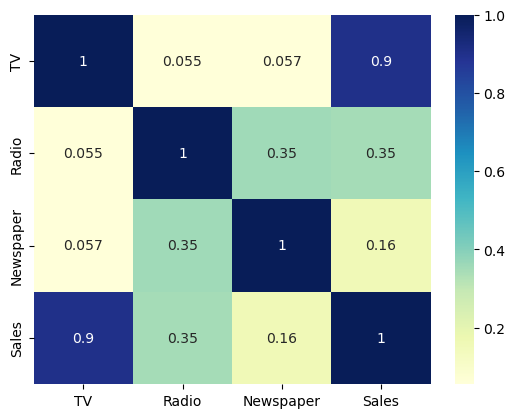

In [7]:
sns.heatmap(sd.corr(),annot=True,cmap="YlGnBu")
plt.show()

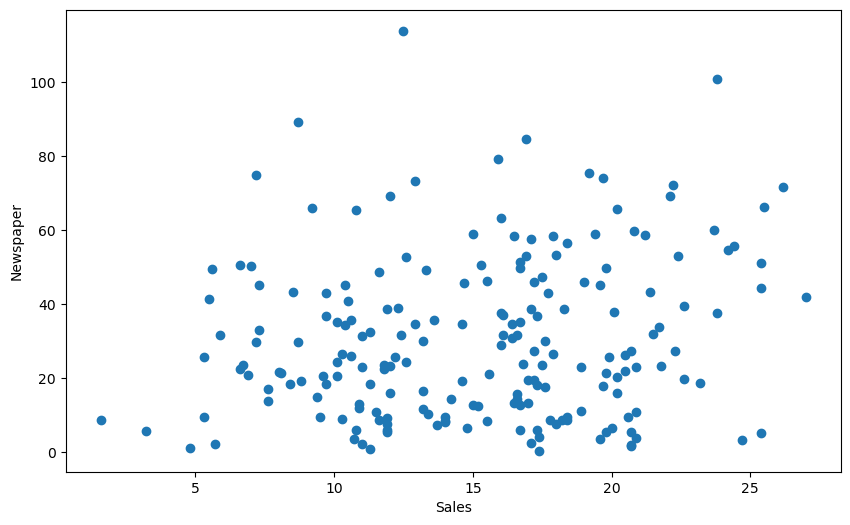

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(sd['Sales'], sd['Newspaper'])
ax.set_xlabel('Sales')
ax.set_ylabel('Newspaper')
plt.show()

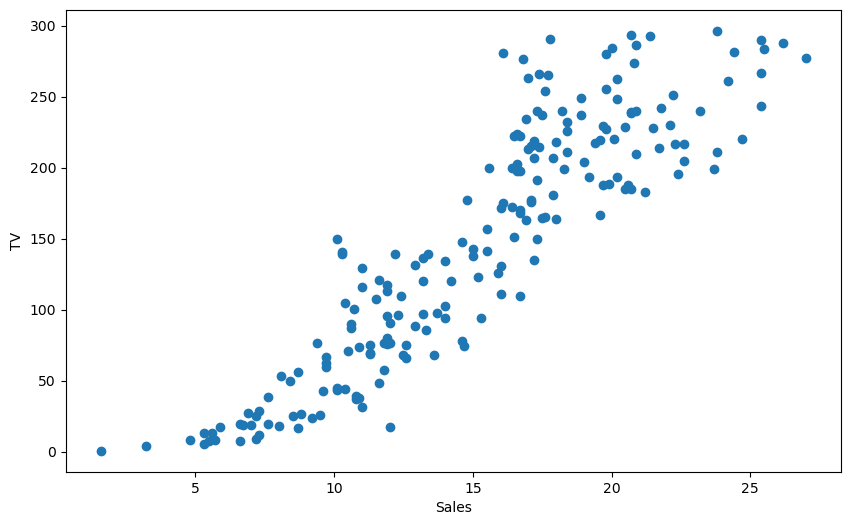

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(sd['Sales'], sd['TV'])
ax.set_xlabel('Sales')
ax.set_ylabel('TV')
plt.show()

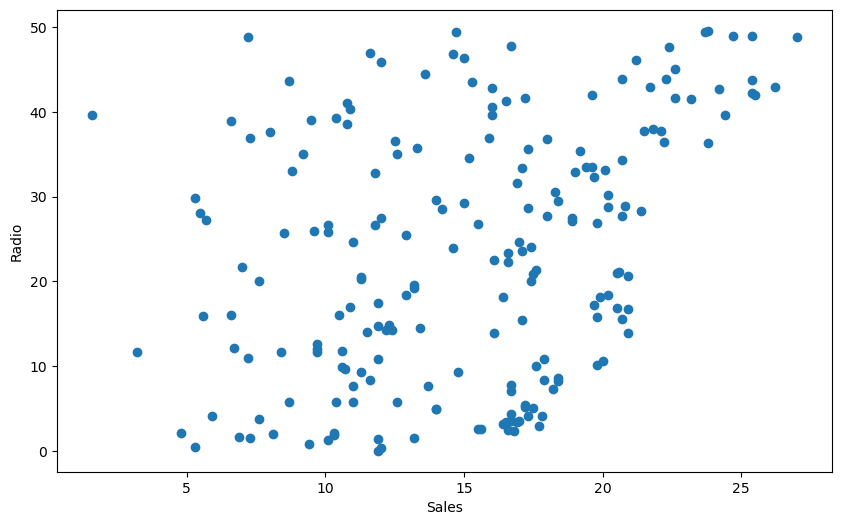

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(sd['Sales'], sd['Radio'])
ax.set_xlabel('Sales')
ax.set_ylabel('Radio')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

# Assuming 'sd' is your DataFrame
x1 = sd[['TV']]
y1 = sd['Sales']

# Create a LinearRegression model instance
model = LinearRegression()

# Fit the model to your data
model.fit(x1, y1)

# Get the model parameters (intercept and coefficient)
intercept = model.intercept_
coefficient = model.coef_

# Print the results
print("Value of B:", intercept)
print("Value of W:", coefficient)


Value of B: 6.9748214882298925
Value of W: [0.05546477]


x = sm.add_constant(x1)
results = sm.OLS(y1,x1).fit()
 
results.summary()

plt.scatter(x1,y1)
 
yhat = 0.0017*x1 + 0.275
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('sales', fontsize = 20)
 
plt.ylabel('TV', fontsize = 20)
 
plt.show()

plt.scatter(x1,y1)
 
yhat = 0.05*x1 + 6.9
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('sales', fontsize = 20)
 
plt.ylabel('TV', fontsize = 20)
 
plt.show()

In [31]:
y_pred=model.predict(x1)
print(y_pred)

[19.73726517  9.44300377  7.92881554 15.37773421 17.00285199  7.45736499
 10.16404579 13.6416869   7.45181851 18.05668263 10.64104282 18.88310771
  8.29488303 12.38263661 18.29518114 17.81263764 10.73533293 22.5826079
 10.8129836  15.14478218 19.08832736 20.142158    7.70695646 19.63742859
 10.43027669 21.55650964 14.90073719 20.29191288 20.77445638 10.89063428
 23.22045276 13.23679407 12.36599718 21.70626452 12.28280002 23.09843026
 21.77836873 11.11803984  9.3653531  19.62078916 18.20643751 16.79208586
 23.2592781  18.4504825   8.36698723 16.6867028  11.9500114  20.28081992
 19.57641734 10.68541463 18.05668263 12.54348444 18.97739782 17.10268858
 21.54541669 18.00676433  7.37971431 14.52912323 18.6667951  18.66124863
  9.94218671 21.46776601 20.24754106 12.67105342 14.2462529  10.80189065
  8.72196176 14.70106401 20.142158   18.99958373 18.01785729 13.06485329
  8.46127734 14.15196279 18.81100351  7.91217611  8.50010268 13.65832633
  7.27433125 13.40873486 11.21232995 20.27527345 11.

In [29]:
results = pd.DataFrame()

In [33]:
results = pd.DataFrame({'Coefficient': model.coef_, 'Intercept': model.intercept_})
results.to_csv('linear_regression_results.csv', index=False)


In [5]:
x=input("Enter value of TV promotion:")
x1=float(x)
r=0.05546477*x1+6.9748214882298925
print("Sale will be:",r)

Enter value of TV promotion:34
Sale will be 8.860623668229891
